# Projeto 1 - Ciência dos Dados

### Nome: Ykaro de Sousa Andrade

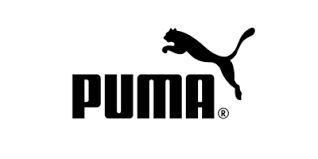

## Tema do projeto 
## Produto: Marca multinacional PUMA.

Tal escolha foi feita pois desde que o jogador de futebol Neymar Jr assumiu como o mais novo garoto propaganda da Puma, a marca começou a ter um maior engajamento nas redes sociais. Por este motivo, analisar os dados obtidos após tal repercussão no twitter é fator primordial para que haja um melhor entendimento da opinião dos clientes e assim aprimorar as próximas campanhas de marketing da empresa por exemplo.


Foi obtido uma base de dados com tweets postados pelos usuários da rede social. A partir disso, classificou-se os tweets entre relevantes e irrelevantes. A partir disso **classificou-se como tweets relevantes todos aqueles que enalteciam a marca**, e em contra partida **classificou-se como tweets irrelevante todos aqueles que falavam mal da marca ou não tinham relação direta com a Puma**.


Dessarte, ao analisar os tweets, percebeu-se que os assuntos mais frequentemente relacionados a marca se tratavam de:

•	Desde que o Neymar foi contratado para ser garoto propaganda, a Puma começou a fabricar produtos mais bonitos;

•	 Devido a alguma peça do vestuário da Puma que o Neymar foi visto usando, o público tinha maior interesse em adiquirir o produto;

•	 Observou-se muitos tweets relacionados à marca onde a enquadrava como pertencente ao top3 marcas mundiais, tais como: Nike e Adidas;

•   Internautas comentaram sobre o design das peças estarem mais bonitos;

•	Tweets relacionados a satisfação dos fãs desde que que Neymar se tornou patrocinado da Puma;


___
Carregando algumas bibliotecas:

In [157]:
#importando bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display
pd.options.display.max_rows = 13
import emoji
import re

In [158]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\ykaro\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\3 semestre\Ciência dos Dados\Projeto Classificador Naive Bayes\projeto_datascience


In [159]:
# definindo função de limpeza dos caracteres dos tweets e espaçando os emajis e palavras corretamente.

def cleanup(text):
    #import string
    punctuation = '[!-.:?;\n)(*$#@''""]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    text_subbed = emoji.get_emoji_regexp().split(text_subbed) #emoji
    return ' '.join(text_subbed)

Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [160]:
filename = 'puma.xlsx'

In [161]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Irrelevante 0 / Relevante 1
0,o neymar inovou a puma https://t.co/qtcuvd1svj,1
1,"a @puma tá deitando nas chuteiras do neymar, m...",1
2,fico assim no da puma affss https://t.co/1ygyh...,0
3,"@g_estrella__ puma tá aí , mas três listra tá ...",1
4,@0ketlyn_s eu acho que um puma ^^,0


In [162]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Irrelevante 0 / Relevante 1
0,@0chavex0 @ornate_puma vdd to resfriado,0
1,📽 neymar e puma 👀❤!!\ntemos novidades vindo aí...,1
2,@brgmsch mas a puma nem patrocina a aston,0
3,📽 puma neymar jr creativity a inovadora chute...,1
4,"a puma tá a evoluir muito, quem me dera que o ...",1


___
## Classificador automático de sentimento


**O projeto consiste na análise de tweets da marca esportiva Puma.**


Foi definido como premissa que os tweets relevantes seriam todos aqueles que exaltavam a marca em seus comentários, em contra partida os tweets irrelevantes seriam todos os outros, ou seja, os que não tinham relação direta com a marca e/ou falavam mal da Puma.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [163]:
# Todos os tweets da base de dados :
dados = pd.read_excel('puma.xlsx')
#dados

In [164]:
# Separando apenas a planilha de Treinamento :
t_treinamento = dados.loc[:, 'Treinamento']
#t_treinamento

In [165]:
# Processo de limpeza dos tweets de treinamento usando a função que definimos como cleanup.
lista_limpa = []
for index, argumento in enumerate (t_treinamento):
    #print(f'posição {index} tweeter: {argumento}')
    limpa = cleanup(argumento.lower())
    lista_limpa.append(limpa)
    
#print(lista_limpa)

In [166]:
# Criando um novo data frame com os tweets de treinamentos limpos
dados['Limpo'] = lista_limpa
#dados

In [167]:
# Filtrando apenas os tweets relevantes e os adicionando em uma nova variável
relevante = dados.loc[dados['Irrelevante 0 / Relevante 1'] == 1, 'Limpo']
#relevante

In [168]:
# 1° for: Separar os tweets relevantes em palavras relevantes dando um split em cada tweet.
p_relevantes = [] 
for c,conteudo in enumerate (relevante):
    p_relevantes.append(conteudo.split())
    
#print(p_relevantes)


In [169]:
# Definindo todas as palvras revelantes em um conjunto
todas_palavras_relevantes=[]
for index, conteudo in enumerate(p_relevantes):
    cont=0
    while cont < len(p_relevantes[index]):
        novo= conteudo[cont]
        todas_palavras_relevantes.append(novo)
        cont+=1
#print(todas_palavras_relevantes)

In [170]:
# Informando o total de palavras dos tweets relevantes
print(f' O total de Palavras relevantes é {len(todas_palavras_relevantes)}')

 O total de Palavras relevantes é 1730


In [171]:
# Fazendo uma nova limpeza, retirando todos os 'https', pois está str não é relevante para nossa análise
lista_de_links = []
for index, conteudo in enumerate(todas_palavras_relevantes):
    #print(f'{index}: {conteudo}')
    cont = 0
    while cont < len(todas_palavras_relevantes[index]):
        #print(conteudo[cont])
        if conteudo[cont:5] == 'https':
            #print(f' palvra: {lista[index]} na posição {index}')
            lista_de_links.append(todas_palavras_relevantes[index])
        cont+=1

lista_nova_r = []
cont2 = 0
while cont2 < len(todas_palavras_relevantes):
    if todas_palavras_relevantes[cont2] not in lista_de_links:
        lista_nova_r.append(todas_palavras_relevantes[cont2])
    cont2+=1

# Atualização da variável todas_palavras_relevantes sem os https:

todas_palavras_relevantes= lista_nova_r

In [172]:
print(f' O total de Palavras relevantes sem a string "htpps" é {len(todas_palavras_relevantes)}')

 O total de Palavras relevantes sem a string "htpps" é 1691


In [173]:
# Guardando as palavras como um pd.Series
serie_relevante = pd.Series(todas_palavras_relevantes)

# Frequencia absoluta de palavras relevantes
tabela_relevante = serie_relevante.value_counts()
#tabela_relevante

<div id="Fazendo o mesmo para as palavras irrelevantes"></div>

# Fazendo o mesmo para as palavras irrelevantes.



In [174]:
# Filtrando apenas os tweets irrelevantes e os adicionando em uma nova variável
irrelevante = dados.loc[dados['Irrelevante 0 / Relevante 1'] == 0, 'Limpo']
#irrelevante

In [175]:
# 1° for: Separar os tweets irrelevantes em palavras irrelevantes dando um split em cada tweet.
p_irrelevantes = []
for index, conteudo in enumerate (irrelevante):
    p_irrelevantes.append(conteudo.split())
    
# print(p_irrelevantes)


In [176]:
# Definindo todas as palvras irrevelantes em um conjunto
todas_palavras_irrelevantes=[]
for index, conteudo in enumerate(p_irrelevantes):
    cont=0
    while cont < len(p_irrelevantes[index]):
        novo= conteudo[cont]
        todas_palavras_irrelevantes.append(novo)
        cont+=1
#print(todas_palavras_irrelevantes)

In [177]:
# Informando o total de palavras dos tweets relevantes
print(f' O total de Palavras irrelevantes é {len(todas_palavras_irrelevantes)}')

 O total de Palavras irrelevantes é 3115


In [178]:
# Aprimorando a limpeza dos Tweets
# Fazendo limpeza de links iniciados com http. 

lista_de_links= []
for index, conteudo in enumerate(todas_palavras_irrelevantes):
    #print(f'{index}: {conteudo}')
    cont = 0
    while cont < len(todas_palavras_irrelevantes[index]):
        #print(conteudo[cont])
        if conteudo[cont:5] == 'https':
            #print(f' palvra: {lista[index]} na posição {index}')
            lista_de_links.append(todas_palavras_irrelevantes[index])
        cont+=1

lista_nova_irr = []
cont2 = 0
while cont2 < len(todas_palavras_irrelevantes):
    if todas_palavras_irrelevantes[cont2] not in lista_de_links:
        lista_nova_irr.append(todas_palavras_irrelevantes[cont2])
    cont2+=1

# Atualização da variável todas_palavras_relevantes sem os https:

todas_palavras_irrelevantes= lista_nova_irr


In [179]:
print(f' O total de Palavras irrelevantes sem os "htpps": {len(todas_palavras_irrelevantes)}')

 O total de Palavras irrelevantes sem os "htpps": 3067


In [180]:
# Guardando as palavras irrelevantes como um pd.Series
serie_irrelevante = pd.Series(todas_palavras_irrelevantes)

# Frequencia absoluta de palavras relevantes
tabela_irrelevante = serie_irrelevante.value_counts()
#tabela_irrelevante

### Todas as palavras

In [181]:
# Total de palavras com repetição.
total_de_palavras = todas_palavras_relevantes + todas_palavras_irrelevantes
print(f'O total de palavras com repetição é {len(total_de_palavras)}')


O total de palavras com repetição é 4758


In [182]:
x = pd.concat([serie_relevante, serie_irrelevante])
#x

In [183]:
total_p_sem_r = x.value_counts().shape[0]
#total_p_sem_r

### Probabilidade

### Teorema de Bayes

In [184]:
# Calculando as probabilidades 

Probabilidade_de_ser_relevante = len(todas_palavras_relevantes)/len(total_de_palavras)
Probabilidade_de_ser_irrelevante = len(todas_palavras_irrelevantes)/len(total_de_palavras)
print(Probabilidade_de_ser_relevante)
print(Probabilidade_de_ser_irrelevante)
print(len(total_de_palavras))

0.35540142917192097
0.644598570828079
4758


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [185]:
planilha_teste = pd.read_excel('puma.xlsx', sheet_name = 'Teste')
planilha_teste['Irrelevante 0 / Relevante 1'].value_counts(True)
#planilha_teste

0    0.59
1    0.41
Name: Irrelevante 0 / Relevante 1, dtype: float64

In [186]:
# Separando apenas a planilha de Testes.
t_teste = planilha_teste.loc[:, 'Teste']
#t_teste

In [187]:
# Limpando os tweets de teste usando a função que definimos como cleanup.
lista2_limpa = []
for index, argumento in enumerate (t_teste):
    #print(f'posição {index} tweeter: {argumento}')
    limpa = cleanup(argumento.lower())
    lista2_limpa.append(limpa)
    
#print(lista2_limpa)

In [188]:
# 1° for: Separar os tweets relevantes em palavras relevantes dando um split
lista_geral_teste= [] 
for c,conteudo in enumerate (lista2_limpa):
    lista_geral_teste.append(conteudo.split())
    
#print(lista_geral_teste)

### Teorema de Bayes

<div id="a-ingenuidade-naive-bayes"></div>

### A ingenuidade - Naïve Bayes

Agora vamos a parte da ingênua do Naïve Bayes.
Tal igenuidade consiste em assumir que as palavras são independentes entre si e que sua ordem na frase não importa. 



$\quad P(tweet|R) = 
P( o |R)\cdot P( neymar |R)\cdot P( inovou |R)\cdot P( a |R)\cdot P( puma |R)$




<br>

Vamos denotar **Tweets Relevantes** simplesmente como $R$, para ficar melhor a visualização para a aplicação do Teorema de Bayes.

Assim, a fórmula completa fica:

$P(R|tweet) = \frac{P(o|R).P(neymar|R).P(inovou|R).P(a|R).P(puma|R).P(R)}{P(tweet)}$

<br>

Da mesma forma, denotando **Os Tweets irrelevantes** como $IRR$, a fórmula completa fica:

$P(IRR|tweet) = \frac{P(o|IRR).P(neymar|IRR).P(inovou|IRR).P(a|IRR).P(puma|IRR).P(IRR)}{P(tweet)}$

<br>



Note que o denominador das duas probabilidade condicionais acima é o mesmo, para fazer a classificação do tweet podemos cancelar o cálculo do denominador $P(tweet)$. 

Assim, a **Classificação da frase** se dará conforme abaixo:

$\quad \Rightarrow$ Se $P(R|tweet) > P(IRR|tweet)$, então frase será classificada como um *Tweet Relevante*.

$\quad \Rightarrow$ Se $P(R|tweet) < P(IRR|tweet)$, então frase será classificada como um *Tweet Irrelevante*.


In [189]:
# Definindo classificação dos tweets da planilha teste

lista_classificador = []

laplace_relevante = Probabilidade_de_ser_relevante
laplace_irrelevante = Probabilidade_de_ser_irrelevante


for tweet in lista_geral_teste:
    
    for palavra in tweet:
    
        if palavra not in tabela_relevante and palavra not in tabela_irrelevante:
            laplace_relevante *= (0 + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (0 + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)


        elif palavra not in tabela_irrelevante and palavra in tabela_relevante:
            laplace_irrelevante *= (0 + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)
            laplace_relevante *= (tabela_relevante[palavra] + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)

        elif palavra not in tabela_relevante and palavra in tabela_irrelevante:
            laplace_relevante *= (0 + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (tabela_irrelevante[palavra] + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)



        elif palavra in tabela_relevante and palavra in tabela_irrelevante:
            laplace_relevante *= (tabela_relevante[palavra] + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (tabela_irrelevante[palavra] + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)



    if laplace_relevante > laplace_irrelevante:
        lista_classificador.append(1)
    else:
        lista_classificador.append(0)
    
    laplace_relevante = Probabilidade_de_ser_relevante
    laplace_irrelevante = Probabilidade_de_ser_irrelevante



In [190]:
planilha_teste["Algoritimo Classificador"] = lista_classificador
planilha_teste.head(10)


,Teste,Irrelevante 0 / Relevante 1,Algoritimo Classificador
0,@0chavex0 @ornate_puma vdd to resfriado,0,0
1,📽 neymar e puma 👀❤!!\ntemos novidades vindo aí...,1,1
2,@brgmsch mas a puma nem patrocina a aston,0,0
3,📽 puma neymar jr creativity a inovadora chute...,1,1
4,"a puma tá a evoluir muito, quem me dera que o ...",1,0
5,neymar de puma 🤤,1,1
6,@anthrpocene puma é a única música deles que n...,0,0
7,@slbdiogo_ warning: eu quero a puma este mano ...,0,1
8,@srtonalves palmeiras tem dinheiro de vendas d...,0,0
9,agora fudeu o caralho todo mermo vao puma porra,0,0


In [191]:
m = pd.crosstab(planilha_teste['Irrelevante 0 / Relevante 1'], planilha_teste['Algoritimo Classificador'], normalize=True)
m

Algoritimo Classificador,0,1
Irrelevante 0 / Relevante 1,,
0,0.330,0.260
1,0.085,0.325


### Performace do Classificador

In [192]:
y = m[0][0] + m[1][1]
print(f'A performace do Classificador de tweets é de {100*y}%')

A performace do Classificador de tweets é de 65.5%


A acurácia do Classificador é de 65.5%. Podemos observar que a classificação de falsos 0's se mostrou satisfatória. 
Por outro lado a classificação de falsos 1's ficou bem alta, isso ocorreu por conta de tweets que possuiam ironias,
gírias e dupla negação, o que é característico no nicho de futebol e público jovem. O classificador não consegue identificar o sentimentos atribuidos às palavras apenas analisando as probabilidade Bayesianas.

### Porquê não pode usar o próprio classificador para gerar mais amostras de treinamento?

Não podemos utilizar o próprio classificador para alimentar nossa base de treinamento, pois o mesmo possuiria um viés na classificação do novos tweets, visto que as frequências de palavras relevantes e irrelevantes estariam baseadas no Data Frame de treinamento inicial. 

### Diferentes cenários em que Naïve Bayes pode ser aplicado

Pode-se utilizar o classificador Naive Bayes em interfaces de Email, por exemplo Gmail e Outlook, a classificação de quais emails estarão nas abas de destaque, outros ou spam são classificadas a partir de Naive Bayes. Com isso os emails mais relevantes são adionados nos destaques e os prováveis menos relevantes são adicionados à caixa de spam.

Outro exemplo de aplicação para Naive Bayes são as tags de vídeos do YouTube.
Quando um produtor de conteúdo (YouTuber) posta seus vídeos, ele adiciona tags relacionadas ao conteúdo referente ao vídeo. Dessa forma, quando o usuário vai pesquisar por uma palavra relacionada à essa tag, o vídeo é recomendado como mais provável para o usuário.

### Sugestões de melhorias para a performace do Classificador

Uma possível iteração para o código é ter uma base de dados maior para Treinamento, além de ter mais pessoas para realizarem a
classificação desses tweets. Assim, a base de dados conterá mais palavras e o viés de escolha será diminuído, pois
haverá mais pessoas participando da classificação (diversidade de opinião).

Outra iteração para o código é criar uma função que identifique palavras que foram escritas juntas e as separem.
Dessa forma, as duas ou mais palavras irão compor as tabela de frequencias de palavras relevantes e de palavras irrelevantes de maneira correta e assim a acurácida do nosso Classificador será mais precisa.

Material de apoio: https://towardsdatascience.com/?gi=e75d71ded956

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências Bibliográficas

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)
Acesso realizado no dia 10/09/2021

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/)
Acesso realizado no dia 10/09/2021

https://towardsdatascience.com/?gi=e75d71ded956
Acesso realizado no dia 26/09/2021